In [7]:
from hear import WavSerializationTrans, WavLocalFileStore
from forged.clickify import clickify, pad_to_length



OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [8]:
# data prep
my_wav_store = WavLocalFileStore("./data/ClickDetection")
click_template = my_wav_store["base_click.wav"]
wf_base = my_wav_store["wf_base.wav"]
long_click = pad_to_length(click_template, len(wf_base))



/Users/sylvain/Desktop/dev/otosense/forged/forged/clickify.py:8: FutureWarning: Pass size=150000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return pad_center(wf_chk, length, mode='constant')


In [9]:
# place clicks at arbitrary timestamps
timestamps = [2000, 10000, 20000, 40000, 60000]
wf_with_clicks = clickify(wf_base, timestamps, long_click, click_marker=None)


In [12]:
wf_with_clicks[-20:]

array([11, 10,  8,  6,  6,  7,  8,  5,  0, -3, -2,  4, 17, 24, 23, 18, 10,
        0, -4, -8], dtype=int16)

In [30]:
from hum import disp_wf

/Users/sylvain/opt/anaconda3/envs/otopy38/lib/python3.8/site-packages/matplotlib/axes/_axes.py:7622: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


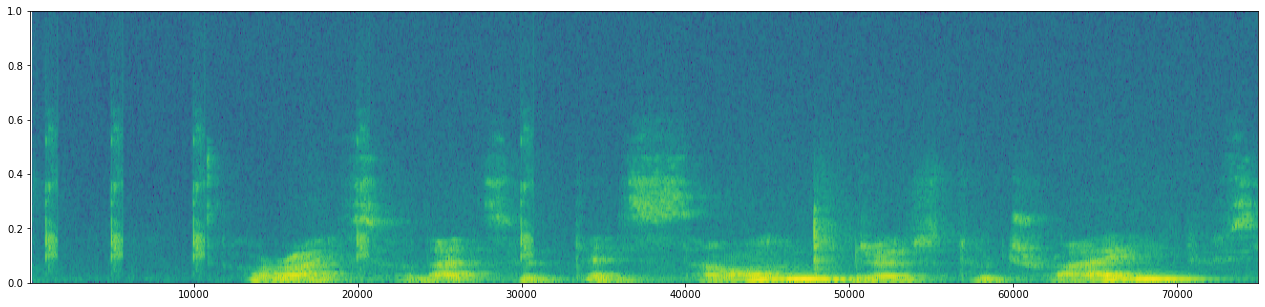

In [31]:
disp_wf(wf_with_clicks)

# smart chunker

In [18]:
# omodel.ml.event_detector

In [19]:
# peruse

In [16]:
# apply pipeline
import numpy as np
from lined import iterize
from lined.tools import BufferStats
from collections import deque
window_stats = iterize(BufferStats(
maxlen=5, func=np.concatenate, add_new_val=deque.extend))
chks = list(wf_with_clicks)


for x in window_stats(chks):
    print(x)

TypeError: 'numpy.int16' object is not iterable

In [16]:
from creek import Creek
import numpy as np

class MyCreek(Creek):
    def data_to_obj(self, line):
        return line+12.
        #return line
stream = MyCreek(wf_with_clicks)

In [22]:
from peruse.peruse.scrap.correlation_detection import MotifDetector

ModuleNotFoundError: No module named 'peruse.single_wf_snip_analysis'

In [24]:
from dataclasses import dataclass
from typing import Sequence, Optional, Iterable

from scipy.signal import correlate, find_peaks
from lined import Line, iterize
from slang import fixed_step_chunker
# from i2 import Sig

from peruse.peruse.util import named_partial

DFLT_CHK_SIZE = 2048


def mk_chunker(chk_size=DFLT_CHK_SIZE, chk_step=None, name='chunker'):
    if chk_step is None:
        chk_step = chk_size
    chunker = named_partial(name, fixed_step_chunker, chk_size=chk_size, chk_step=chk_step)
    chunker.chk_size = chk_size
    chunker.chk_step = chk_step
    return chunker


# wf_to_vols = Line(chunker, iterize(np.std))
# compute_template_corrs = Line(partial(correlate, template, mode='valid'),
#                               lambda x: x / len(template),
#                               )


class MotifDetector:
    """An object that detects locations of a sequence that match a motif sub-sequence."""

    def __init__(self, motif: Sequence, distance='motif_size', **find_peaks_kwargs):
        self.motif = motif
        self.motif_size = len(motif)
        if distance == 'motif_size':
            distance = self.motif_size
        self.distance = distance
        self.find_peaks_kwargs = dict(find_peaks_kwargs, distance=distance)

    def seq_to_match_scores(self, seq: Sequence):
        scores = correlate(self.motif, seq, mode='valid')
        return scores / self.motif_size

    def match_scores_to_peaks(self, scores: Sequence):
        peaks, peak_props = find_peaks(scores, **self.find_peaks_kwargs)
        return peaks

    def seq_to_peaks(self, seq: Sequence):
        return self.match_scores_to_peaks(self.seq_to_match_scores(seq))

    def __repr__(self):
        s = f"{type(self).__name__}(<motif of size {self.motif_size}>, "
        s += ', '.join(k + '=' + str(v) for k, v in self.find_peaks_kwargs.items()) + ')'
        return s

    __call__ = seq_to_peaks

ModuleNotFoundError: No module named 'peruse.single_wf_snip_analysis'

In [29]:
from peruse.peruse.single_wf_snip_analysis import (
           TaggedWaveformAnalysis,
           TaggedWaveformAnalysisExtended
       )

ModuleNotFoundError: No module named 'peruse.single_wf_snip_analysis'

In [17]:
#for line in stream.pre_iter(stream.stream):  # pre_iter: prepare and/or filter the stream
for line in stream:  # pre_iter: prepare and/or filter the stream

    obj = stream.data_to_obj(line)  # data_to_obj: Transforms the data that stream yields
    #if self.post_filt(obj):  # post_filt: Filters the stream further (but based on object now)
    print(obj)

24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0


In [3]:
from streamz.streamz.river import RiverTrain


ModuleNotFoundError: No module named 'streamz.streamz'